In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('zomato_clean.csv')
df.head()

,Unnamed: 0,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [3]:
df.shape

(23259, 15)

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [5]:
print(df[['votes', 'approx_cost(for two people)', 'rate']].head(10))

   votes  approx_cost(for two people)  rate
0    775                        800.0   4.1
1    787                        800.0   4.1
2    918                        800.0   3.8
3     88                        300.0   3.7
4    166                        600.0   3.8
5    286                        600.0   3.8
6   2556                        600.0   4.6
7    324                        700.0   4.0
8    504                        550.0   4.2
9    402                        500.0   4.1


In [6]:
df["votes"]=(df["votes"]-df["votes"].mean())/df["votes"].std()

In [7]:
df["approx_cost(for two people)"]=(df["approx_cost(for two people)"]-df["approx_cost(for two people)"].mean())/df["approx_cost(for two people)"].std()

In [8]:
print(df[['votes', 'approx_cost(for two people)', 'rate']].head(10))

      votes  approx_cost(for two people)  rate
0  0.152325                     0.089174   4.1
1  0.163102                     0.089174   4.1
2  0.280751                     0.089174   3.8
3 -0.464658                    -0.871449   3.7
4 -0.394607                    -0.295075   3.8
5 -0.286837                    -0.295075   3.8
6  1.751810                    -0.295075   4.6
7 -0.252710                    -0.102950   4.0
8 -0.091055                    -0.391137   4.2
9 -0.182660                    -0.487200   4.1


In [9]:
x_cost=df['approx_cost(for two people)']

In [10]:
y_label=df['votes']

In [11]:
z_label=df['rate']

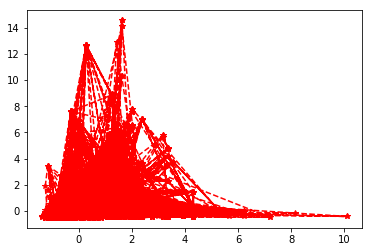

In [12]:
plt.plot(x_cost, y_label,"r*--")

In [13]:
#lets delete the nulll values
dishes_data = df[df.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [14]:
dishes_data.isnull().sum()


address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

Text(0,0.5,'Count')

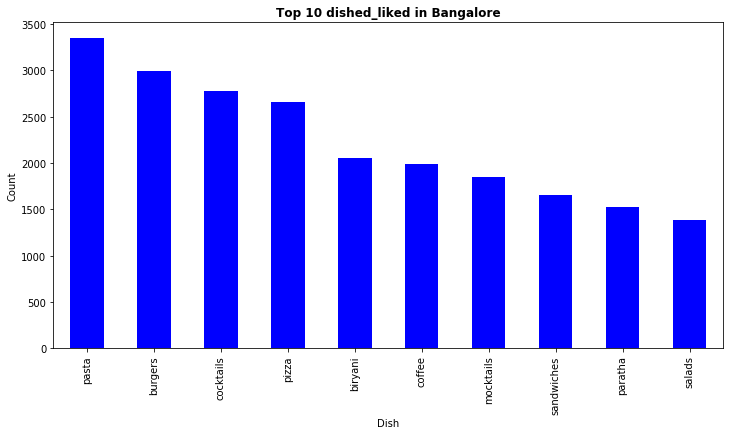

In [16]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'b')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

In [17]:
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)

In [18]:
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r: float(r))

3.9058343007


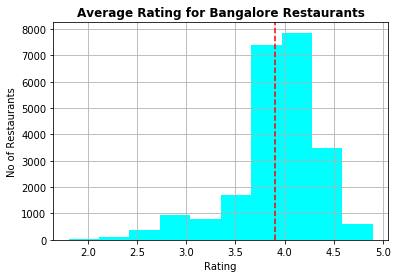

In [19]:
df.rate.hist(color='cyan')
plt.axvline(x= df.rate.mean(),ls='--',color='red')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(df.rate.mean())

In [20]:
df["rate"]=(df["rate"]-df["rate"].mean())/df["rate"].std()

In [21]:
print(df[['votes', 'approx_cost(for two people)', 'rate']].head(10))

      votes  approx_cost(for two people)      rate
0  0.152325                     0.089174  0.455712
1  0.163102                     0.089174  0.455712
2  0.280751                     0.089174 -0.248396
3 -0.464658                    -0.871449 -0.483098
4 -0.394607                    -0.295075 -0.248396
5 -0.286837                    -0.295075 -0.248396
6  1.751810                    -0.295075  1.629225
7 -0.252710                    -0.102950  0.221009
8 -0.091055                    -0.391137  0.690415
9 -0.182660                    -0.487200  0.455712


In [47]:
x=df[['votes']]
x.shape

(23259, 1)

In [48]:
y=df['approx_cost(for two people)']
y.shape

(23259,)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23259 entries, 0 to 23258
Data columns (total 14 columns):
address                        23259 non-null object
name                           23259 non-null object
online_order                   23259 non-null object
book_table                     23259 non-null object
rate                           23259 non-null float64
votes                          23259 non-null float64
location                       23259 non-null object
rest_type                      23259 non-null object
dish_liked                     23259 non-null object
cuisines                       23259 non-null object
approx_cost(for two people)    23259 non-null float64
reviews_list                   23259 non-null object
listed_in(type)                23259 non-null object
listed_in(city)                23259 non-null object
dtypes: float64(3), object(11)
memory usage: 2.7+ MB


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_test,y_pred_lr )

0.0758154567382785

In [53]:
lr.score(X_test, y_test)*100


7.58154567382785

In [54]:
x.shape

(23259, 1)

In [37]:
X_test

,votes,rate
11507,-0.355990,0.221009
990,-0.309289,-1.421909
4318,-0.370359,0.221009
18883,-0.379340,-0.013693
17271,-0.501479,0.221009
16389,7.615390,1.159820
713,-0.485314,0.221009
5181,0.437915,1.159820
18148,-0.282347,0.925117
15245,-0.344315,-0.248396


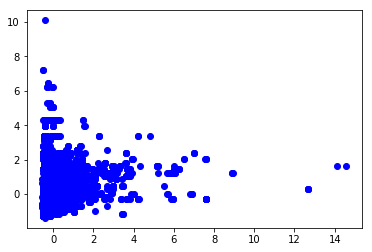

In [55]:
plt.scatter(X_test,y_test,color="blue")